CODE TO GENERATE A WORD CLOUD OF THE MOST COMMON SPECIES IN THE DATASET. A MASK OF TREE IS USED.

In [1]:
# Import modules
import pandas as pd
import numpy as np
from collections import Counter

from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df=pd.read_csv('2015_Street_Tree_Census_Tree_Data.csv')
print('Dataset imported')

Dataset imported


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
tree_id             683788 non-null int64
block_id            683788 non-null int64
created_at          683788 non-null object
tree_dbh            683788 non-null int64
stump_diam          683788 non-null int64
curb_loc            683788 non-null object
status              683788 non-null object
health              652172 non-null object
spc_latin           652169 non-null object
spc_common          652169 non-null object
steward             652173 non-null object
guards              652172 non-null object
sidewalk            652172 non-null object
user_type           683788 non-null object
problems            652124 non-null object
root_stone          683788 non-null object
root_grate          683788 non-null object
root_other          683788 non-null object
trunk_wire          683788 non-null object
trnk_light          683788 non-null object
trnk_other          683788 non-nu

In [4]:
# remove rows that don't have a species name
df.dropna(subset=['spc_common'],axis=0,inplace=True)

In [5]:
# keep only species column
species=df.spc_common

# most common species
species.value_counts()[:20]

London planetree     87014
honeylocust          64264
Callery pear         58931
pin oak              53185
Norway maple         34189
littleleaf linden    29742
cherry               29279
Japanese zelkova     29258
ginkgo               21024
Sophora              19338
red maple            17246
green ash            16251
American linden      13530
silver maple         12277
sweetgum             10657
northern red oak      8400
silver linden         7995
American elm          7975
maple                 7080
purple-leaf plum      6879
Name: spc_common, dtype: int64

In [6]:
# prepare text and shape to use as mask
spl=list(species)
word_could_dict=Counter(spl)

tree_mask = np.array(Image.open( "tree.png"))

In [7]:
tree_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transf_tree_mask = np.ndarray((tree_mask.shape[0],tree_mask.shape[1]), np.int32)

for i in range(len(tree_mask)):
    transf_tree_mask[i] = list(map(transform_format, tree_mask[i]))    

transf_tree_mask    

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

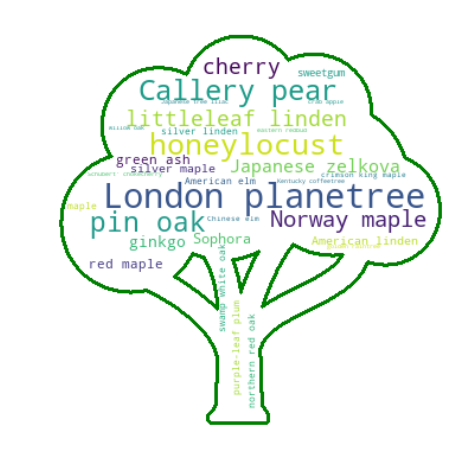

In [9]:
wordcloud = WordCloud(max_words=30, 
                       background_color='white', mask=transf_tree_mask,
                      contour_width=2, contour_color='green').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

In [ ]:
# save to file
#wordcloud.to_file("tree_wordcloud.png")